In [39]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from IPython.display import clear_output

In [40]:
def ttest(data):
    
    print("Null Hypothesis: Control and Variation groups have the same conversion rates")
    
    # Split the data into control and variation groups
    control = data[data['TvC'] == 'C']['conversion']
    variation = data[data['TvC'] == 'V1']['conversion']

    # Perform the t-test
    t_stat, p_value = stats.ttest_ind(control, variation)

    # Print the t-statistic and p-value
    print(f"t-statistic: {t_stat}")
    print(f"p-value: {p_value}")

    # Interpret the results
    if p_value < 0.05:
        print("We reject the null hypothesis and conclude that the conversion rates for Control and Variation are significantly different.")
    else:
        print("We fail to reject the null hypothesis and conclude that there's not enough evidence to say that the conversion rates for Control and Variation are significantly different.")

In [41]:
def display(data):
    
    # Create the figure
    fig = plt.figure(figsize=(20, 30))

    # Conversion Rates Over Time
    plt.subplot(4, 2, 1)
    data['date'] = pd.to_datetime(data['date'])
    conversion_over_time = data.groupby(['TvC', 'date'])['conversion'].mean().unstack('TvC')
    conversion_over_time.plot(kind='line', ax=plt.gca())
    plt.title('Conversion Rates Over Time')
    plt.ylabel('Conversion Rate')

    # Conversion Rates by Traffic Source
    plt.subplot(4, 2, 2)
    conversion_by_traffic_source = data.groupby(['TvC', 'traffic_source'])['conversion'].mean().unstack('TvC')
    conversion_by_traffic_source.plot(kind='bar', ax=plt.gca())
    plt.title('Conversion Rates by Traffic Source')
    plt.ylabel('Conversion Rate')
    plt.xticks(rotation=45)

    # Conversion Rates by Device Type
    plt.subplot(4, 2, 3)
    conversion_by_device = data.groupby(['TvC', 'device_type'])['conversion'].mean().unstack('TvC')
    conversion_by_device.plot(kind='bar', ax=plt.gca())
    plt.title('Conversion Rates by Device Type')
    plt.ylabel('Conversion Rate')
    plt.xticks(rotation=0)

    # Conversion Rates by Browser Language
    plt.subplot(4, 2, 4)
    conversion_by_language = data.groupby(['TvC', 'browser_language'])['conversion'].mean().unstack('TvC')
    conversion_by_language.plot(kind='bar', ax=plt.gca())
    plt.title('Conversion Rates by Browser Language')
    plt.ylabel('Conversion Rate')
    plt.xticks(rotation=45)

    # Conversion Rates by Login Status
    plt.subplot(4, 2, 5)
    conversion_by_login = data.groupby(['TvC', 'login_y_n'])['conversion'].mean().unstack('TvC')
    conversion_by_login.plot(kind='bar', ax=plt.gca())
    plt.title('Conversion Rates by Login Status')
    plt.ylabel('Conversion Rate')
    plt.xticks(rotation=0)

    # Conversion Rates by Return Status
    plt.subplot(4, 2, 6)
    conversion_by_return = data.groupby(['TvC', 'return_y_n'])['conversion'].mean().unstack('TvC')
    conversion_by_return.plot(kind='bar', ax=plt.gca())
    plt.title('Conversion Rates by Return Status')
    plt.ylabel('Conversion Rate')
    plt.xticks(rotation=0)

    # Conversion Rates by Region
    plt.subplot(4, 2, 7)
    conversion_by_region = data.groupby(['TvC', 'region'])['conversion'].mean().unstack('TvC')
    conversion_by_region.plot(kind='bar', ax=plt.gca())
    plt.title('Conversion Rates by Region')
    plt.ylabel('Conversion Rate')
    plt.xticks(rotation=45)

    # Save the figure
    plt.tight_layout()
    plt.savefig("ab_test_results.png")
    
    # Display the figure
    plt.tight_layout()
    plt.show()
    

Null Hypothesis: Control and Variation groups have the same conversion rates
t-statistic: -1.4215677137580898
p-value: 0.15946898280608093
We fail to reject the null hypothesis and conclude that there's not enough evidence to say that the conversion rates for Control and Variation are significantly different.


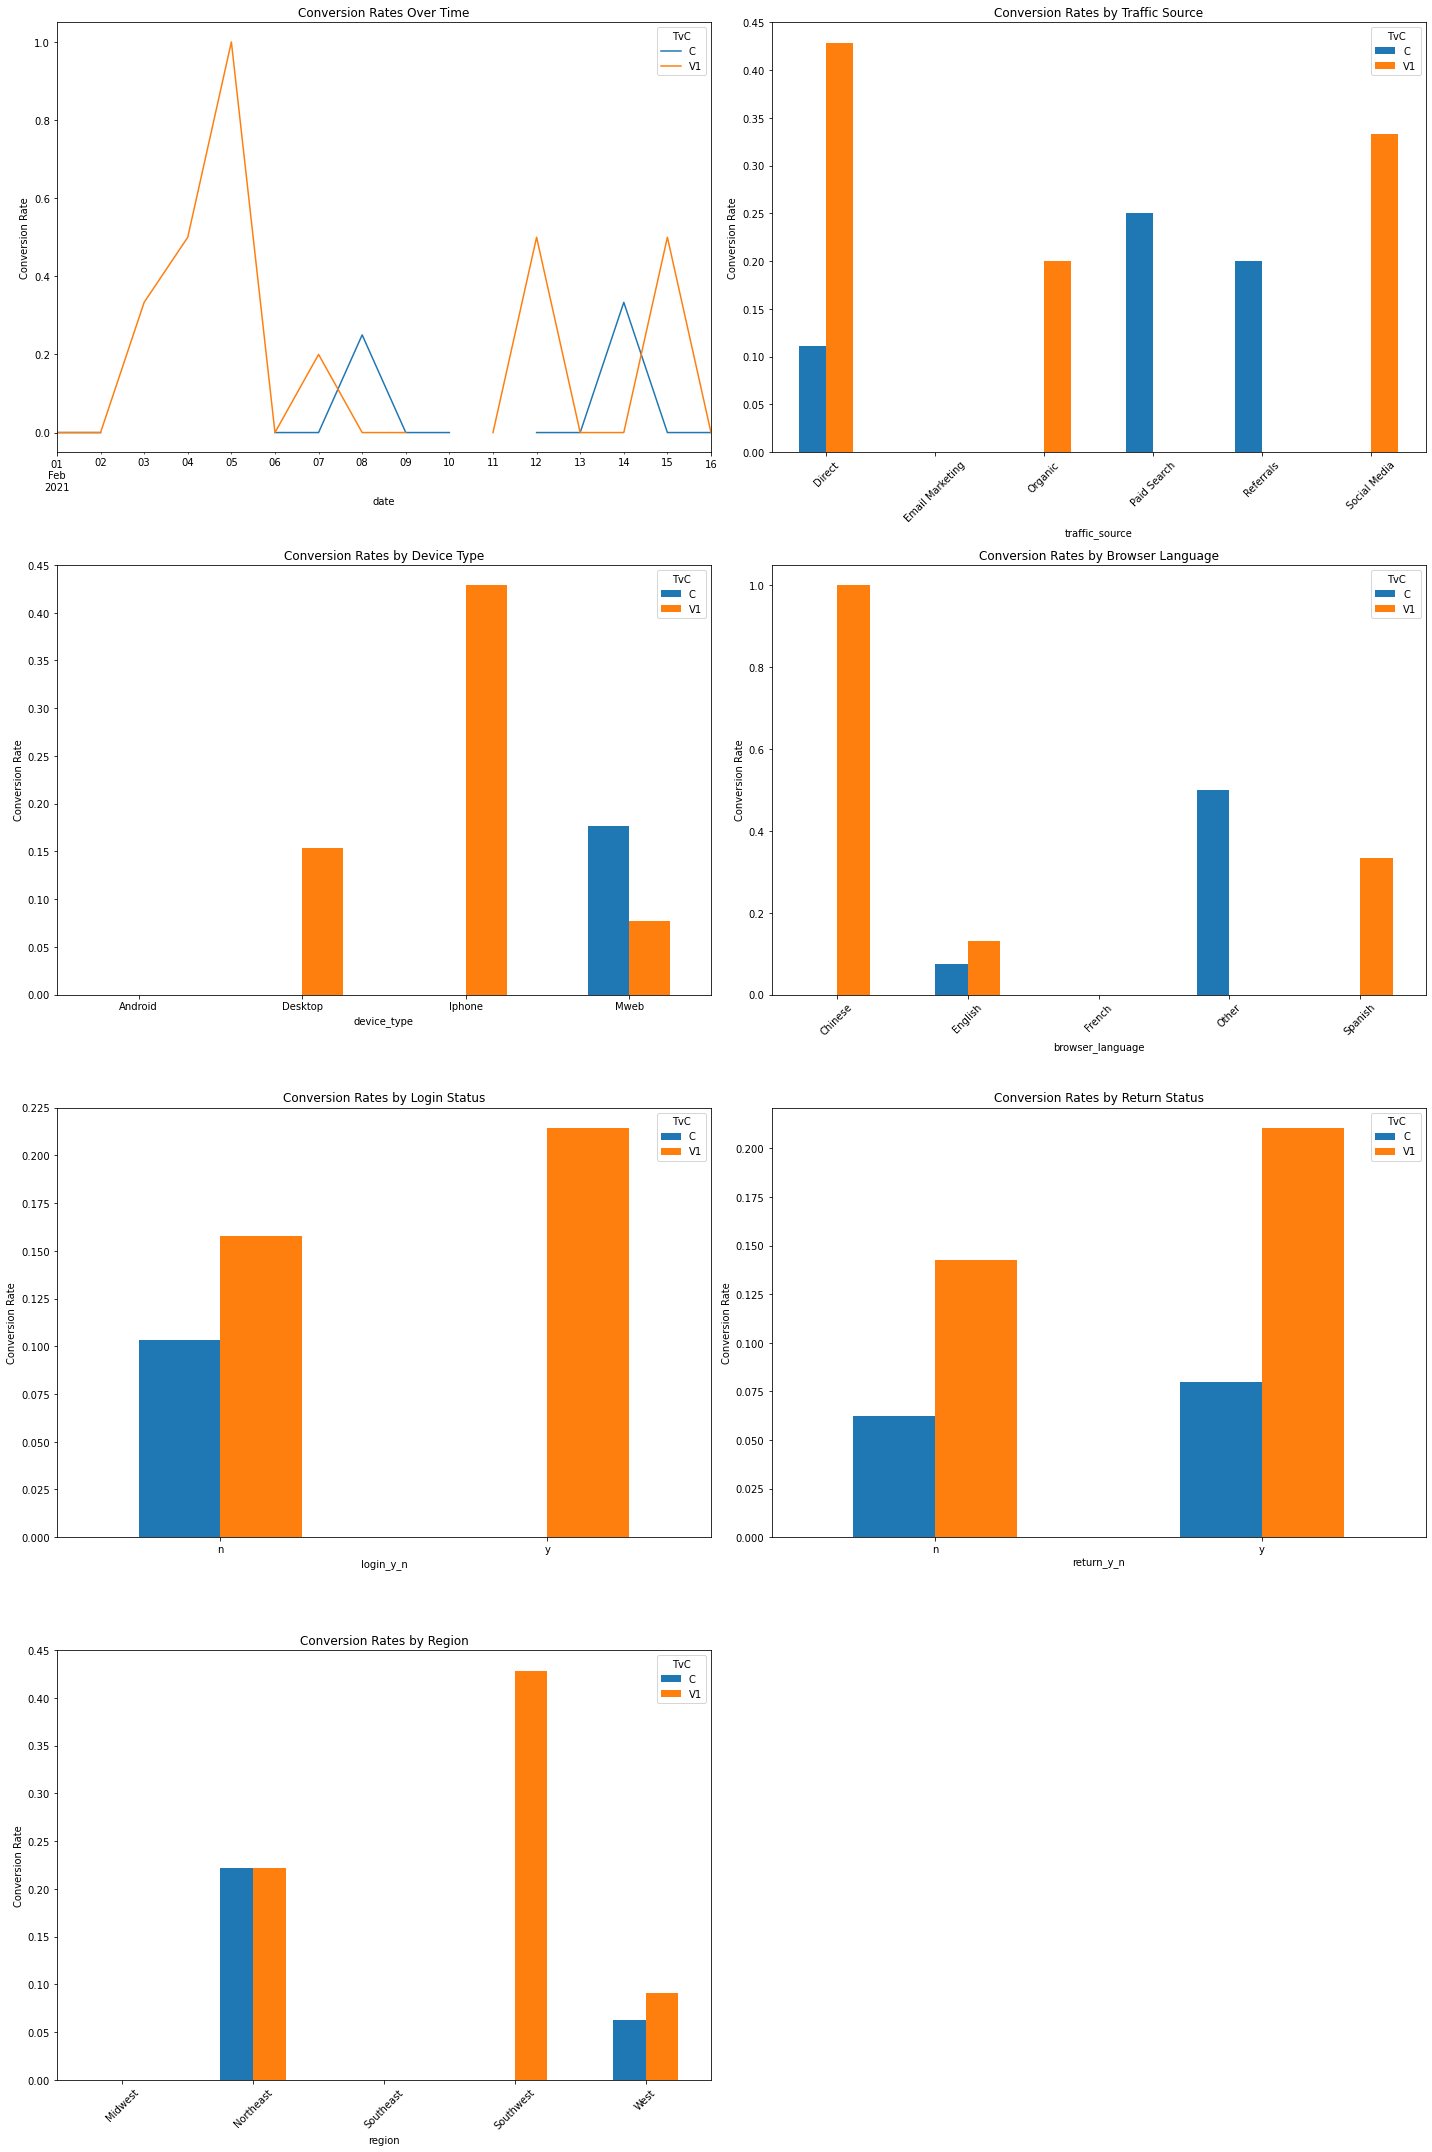

In [ ]:
while True:
    
    # Load the data
    data = pd.read_csv("Data/data.csv")
    
    ttest(data)
    display(data)

    # Wait for 2 minutes
    time.sleep(2*60)
    
    # Clear the output
    clear_output(wait=True)